# Create Templates for PMTs and Trigger

This script takes the output from create_subpods(_allfiles).ipynb which is written to run{runs}data 
____

In [1]:
import os 
import matplotlib
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import utils
import tqdm
import uproot
import numba#
from scipy.optimize import curve_fit
from matplotlib.colors import LogNorm
import scipy
from os.path import exists

In [2]:
runs =[7491]
pmts = utils.get_channel_IDs("TTPC")
print(pmts)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

In [3]:
interp_functions,channels=[],[]
for i in tqdm.tqdm(range(len(pmts))):
    channel=pmts[i]
    file_exists = exists(f'/global/cfs/cdirs/lz/users/yqie/PMT-ANALYSIS/TimingStudies/run{runs}data/channel_{channel}_subpods.pkl')
    if file_exists:
        df_subpods = pd.read_pickle(f'/global/cfs/cdirs/lz/users/yqie/PMT-ANALYSIS/TimingStudies/run{runs}data/channel_{channel}_subpods.pkl')
        print("# of Subpods in Channel "+str(channel)+": "+str(len(df_subpods)))
        if len(df_subpods) ==0:
            continue
        interpfunc_mean = utils.create_average_shape([df_subpods],is_trigger=False)
        del df_subpods
        interp_functions.append(interpfunc_mean)
        channels.append(channel)
    else:
        print(f"channel {channel} does not contain subpods")

  0%|          | 0/253 [00:00<?, ?it/s]

# of Subpods in Channel 0: 4171


  0%|          | 1/253 [00:08<34:27,  8.20s/it]

# of Subpods in Channel 1: 4654


  1%|          | 2/253 [00:16<34:34,  8.26s/it]

# of Subpods in Channel 2: 0
# of Subpods in Channel 3: 4189


  2%|▏         | 4/253 [00:24<22:42,  5.47s/it]

# of Subpods in Channel 4: 4071


  2%|▏         | 5/253 [00:31<24:50,  6.01s/it]

# of Subpods in Channel 5: 4252


  2%|▏         | 6/253 [00:38<26:44,  6.50s/it]

# of Subpods in Channel 6: 4241


  3%|▎         | 7/253 [00:46<28:01,  6.83s/it]

# of Subpods in Channel 7: 3952


  3%|▎         | 8/253 [00:53<28:12,  6.91s/it]

# of Subpods in Channel 8: 3937


  4%|▎         | 9/253 [01:00<28:11,  6.93s/it]

# of Subpods in Channel 9: 4030


  4%|▍         | 10/253 [01:07<28:33,  7.05s/it]

# of Subpods in Channel 10: 3996


  4%|▍         | 11/253 [01:15<28:28,  7.06s/it]

# of Subpods in Channel 11: 4241


  5%|▍         | 12/253 [01:22<29:03,  7.24s/it]

# of Subpods in Channel 12: 4379


  5%|▌         | 13/253 [01:30<29:31,  7.38s/it]

# of Subpods in Channel 13: 1
# of Subpods in Channel 14: 4119


  6%|▌         | 15/253 [01:37<22:04,  5.57s/it]

# of Subpods in Channel 15: 4226


  6%|▋         | 16/253 [01:44<23:28,  5.94s/it]

# of Subpods in Channel 16: 3608


  7%|▋         | 17/253 [01:50<23:35,  6.00s/it]

# of Subpods in Channel 17: 4269


  7%|▋         | 18/253 [01:57<24:53,  6.35s/it]

# of Subpods in Channel 18: 4597


  8%|▊         | 19/253 [02:05<26:17,  6.74s/it]

# of Subpods in Channel 19: 3823


  8%|▊         | 20/253 [02:11<25:45,  6.63s/it]

# of Subpods in Channel 20: 4131


  8%|▊         | 21/253 [02:19<26:10,  6.77s/it]

# of Subpods in Channel 21: 4541


  9%|▊         | 22/253 [02:27<27:29,  7.14s/it]

# of Subpods in Channel 22: 4044


  9%|▉         | 23/253 [02:34<27:15,  7.11s/it]

# of Subpods in Channel 23: 4045


  9%|▉         | 24/253 [02:41<27:13,  7.13s/it]

# of Subpods in Channel 24: 3205


 10%|▉         | 25/253 [02:47<25:33,  6.72s/it]

# of Subpods in Channel 25: 3537


 10%|█         | 26/253 [02:53<24:57,  6.60s/it]

# of Subpods in Channel 26: 4055


 11%|█         | 27/253 [03:00<25:39,  6.81s/it]

# of Subpods in Channel 27: 4152


 11%|█         | 28/253 [03:08<26:14,  7.00s/it]

# of Subpods in Channel 28: 4334


 11%|█▏        | 29/253 [03:16<27:18,  7.31s/it]

# of Subpods in Channel 29: 4567


 12%|█▏        | 30/253 [03:24<28:03,  7.55s/it]

channel 30 does not contain subpods
# of Subpods in Channel 31: 4124


 13%|█▎        | 32/253 [03:31<21:10,  5.75s/it]

# of Subpods in Channel 32: 2861


 13%|█▎        | 33/253 [03:36<20:32,  5.60s/it]

# of Subpods in Channel 33: 3724


 13%|█▎        | 34/253 [03:43<21:26,  5.87s/it]

# of Subpods in Channel 34: 3602


 14%|█▍        | 35/253 [03:49<21:56,  6.04s/it]

# of Subpods in Channel 35: 4045


 14%|█▍        | 36/253 [03:57<23:03,  6.37s/it]

# of Subpods in Channel 36: 2778


 15%|█▍        | 37/253 [04:02<21:29,  5.97s/it]

# of Subpods in Channel 37: 3987


 15%|█▌        | 38/253 [04:09<22:33,  6.30s/it]

# of Subpods in Channel 38: 4072


 15%|█▌        | 39/253 [04:16<23:31,  6.59s/it]

# of Subpods in Channel 39: 3169


 16%|█▌        | 40/253 [04:21<22:19,  6.29s/it]

# of Subpods in Channel 40: 4082


 16%|█▌        | 41/253 [04:29<23:09,  6.56s/it]

# of Subpods in Channel 41: 4488


 17%|█▋        | 42/253 [04:37<24:33,  6.98s/it]

# of Subpods in Channel 42: 4094


 17%|█▋        | 43/253 [04:44<24:46,  7.08s/it]

# of Subpods in Channel 43: 3862


 17%|█▋        | 44/253 [04:51<24:19,  6.98s/it]

# of Subpods in Channel 44: 4321


 18%|█▊        | 45/253 [04:58<25:01,  7.22s/it]

# of Subpods in Channel 45: 4298


 18%|█▊        | 46/253 [05:06<25:27,  7.38s/it]

# of Subpods in Channel 46: 3772


 19%|█▊        | 47/253 [05:13<24:50,  7.24s/it]

# of Subpods in Channel 47: 3871


 19%|█▉        | 48/253 [05:20<24:17,  7.11s/it]

# of Subpods in Channel 48: 3988


 19%|█▉        | 49/253 [05:27<24:12,  7.12s/it]

# of Subpods in Channel 49: 3914


 20%|█▉        | 50/253 [05:34<23:55,  7.07s/it]

# of Subpods in Channel 50: 3797


 20%|██        | 51/253 [05:41<23:34,  7.00s/it]

# of Subpods in Channel 51: 3553


 21%|██        | 52/253 [05:47<22:48,  6.81s/it]

# of Subpods in Channel 52: 1424


 21%|██        | 53/253 [05:50<18:26,  5.53s/it]

# of Subpods in Channel 53: 2589


 21%|██▏       | 54/253 [05:54<17:29,  5.27s/it]

# of Subpods in Channel 54: 0
# of Subpods in Channel 55: 3927


 22%|██▏       | 56/253 [06:02<14:44,  4.49s/it]

# of Subpods in Channel 56: 3671


 23%|██▎       | 57/253 [06:08<16:17,  4.99s/it]

# of Subpods in Channel 57: 3579


 23%|██▎       | 58/253 [06:15<17:25,  5.36s/it]

# of Subpods in Channel 58: 3736


 23%|██▎       | 59/253 [06:21<18:29,  5.72s/it]

# of Subpods in Channel 59: 4318


 24%|██▎       | 60/253 [06:29<20:08,  6.26s/it]

# of Subpods in Channel 60: 3763


 24%|██▍       | 61/253 [06:36<20:23,  6.37s/it]

# of Subpods in Channel 61: 3574


 25%|██▍       | 62/253 [06:42<20:21,  6.39s/it]

# of Subpods in Channel 62: 4019


 25%|██▍       | 63/253 [06:49<20:58,  6.62s/it]

# of Subpods in Channel 63: 3557


 25%|██▌       | 64/253 [06:56<20:51,  6.62s/it]

# of Subpods in Channel 64: 3372


 26%|██▌       | 65/253 [07:02<20:12,  6.45s/it]

# of Subpods in Channel 65: 3333


 26%|██▌       | 66/253 [07:08<19:34,  6.28s/it]

# of Subpods in Channel 66: 3633


 26%|██▋       | 67/253 [07:14<19:44,  6.37s/it]

# of Subpods in Channel 67: 3925


 27%|██▋       | 68/253 [07:21<20:03,  6.51s/it]

# of Subpods in Channel 68: 2465


 27%|██▋       | 69/253 [07:25<18:00,  5.87s/it]

# of Subpods in Channel 69: 3977


 28%|██▊       | 70/253 [07:32<18:56,  6.21s/it]

# of Subpods in Channel 70: 3319


 28%|██▊       | 71/253 [07:39<18:47,  6.19s/it]

# of Subpods in Channel 71: 3097


 28%|██▊       | 72/253 [07:44<18:06,  6.00s/it]

# of Subpods in Channel 72: 3827


 29%|██▉       | 73/253 [07:51<18:44,  6.25s/it]

# of Subpods in Channel 73: 3618


 29%|██▉       | 74/253 [07:58<18:51,  6.32s/it]

# of Subpods in Channel 74: 3713


 30%|██▉       | 75/253 [08:04<18:54,  6.38s/it]

# of Subpods in Channel 75: 3787


 30%|███       | 76/253 [08:11<19:10,  6.50s/it]

# of Subpods in Channel 76: 3816


 30%|███       | 77/253 [08:18<19:26,  6.63s/it]

# of Subpods in Channel 77: 3702


 31%|███       | 78/253 [08:24<19:20,  6.63s/it]

# of Subpods in Channel 78: 3702


 31%|███       | 79/253 [08:31<19:13,  6.63s/it]

# of Subpods in Channel 79: 3498


 32%|███▏      | 80/253 [08:37<18:45,  6.51s/it]

# of Subpods in Channel 80: 4128


 32%|███▏      | 81/253 [08:45<19:21,  6.75s/it]

# of Subpods in Channel 81: 3704


 32%|███▏      | 82/253 [08:51<19:06,  6.70s/it]

# of Subpods in Channel 82: 3931


 33%|███▎      | 83/253 [08:58<19:17,  6.81s/it]

# of Subpods in Channel 83: 3522


 33%|███▎      | 84/253 [09:04<18:39,  6.62s/it]

# of Subpods in Channel 84: 3998


 34%|███▎      | 85/253 [09:12<18:58,  6.78s/it]

# of Subpods in Channel 85: 5008


 34%|███▍      | 86/253 [09:20<20:40,  7.43s/it]

# of Subpods in Channel 86: 4499


 34%|███▍      | 87/253 [09:29<21:05,  7.62s/it]

# of Subpods in Channel 87: 4577


 35%|███▍      | 88/253 [09:37<21:29,  7.81s/it]

# of Subpods in Channel 88: 4784


 35%|███▌      | 89/253 [09:45<21:54,  8.01s/it]

# of Subpods in Channel 89: 4683


 36%|███▌      | 90/253 [09:54<22:03,  8.12s/it]

# of Subpods in Channel 90: 4689


 36%|███▌      | 91/253 [10:02<22:02,  8.17s/it]

# of Subpods in Channel 91: 4862


 36%|███▋      | 92/253 [10:11<22:29,  8.38s/it]

# of Subpods in Channel 92: 4354


 37%|███▋      | 93/253 [10:19<21:54,  8.22s/it]

# of Subpods in Channel 93: 4447


 37%|███▋      | 94/253 [10:27<21:35,  8.15s/it]

# of Subpods in Channel 94: 4525


 38%|███▊      | 95/253 [10:35<21:32,  8.18s/it]

# of Subpods in Channel 95: 4645


 38%|███▊      | 96/253 [10:43<21:38,  8.27s/it]

# of Subpods in Channel 96: 4782


 38%|███▊      | 97/253 [10:52<21:49,  8.40s/it]

# of Subpods in Channel 97: 3564


 39%|███▊      | 98/253 [10:59<20:12,  7.82s/it]

# of Subpods in Channel 98: 3807


 39%|███▉      | 99/253 [11:06<19:31,  7.61s/it]

# of Subpods in Channel 99: 3883


 40%|███▉      | 100/253 [11:12<18:49,  7.38s/it]

# of Subpods in Channel 100: 3655


 40%|███▉      | 101/253 [11:19<17:54,  7.07s/it]

# of Subpods in Channel 101: 3461


 40%|████      | 102/253 [11:25<17:03,  6.78s/it]

# of Subpods in Channel 102: 3497


 41%|████      | 103/253 [11:31<16:25,  6.57s/it]

# of Subpods in Channel 103: 3584


 41%|████      | 104/253 [11:37<16:13,  6.53s/it]

# of Subpods in Channel 104: 3442


 42%|████▏     | 105/253 [11:44<15:49,  6.41s/it]

# of Subpods in Channel 105: 2315


 42%|████▏     | 106/253 [11:48<14:06,  5.76s/it]

# of Subpods in Channel 106: 3707


 42%|████▏     | 107/253 [11:55<14:48,  6.08s/it]

# of Subpods in Channel 107: 3979


 43%|████▎     | 108/253 [12:02<15:33,  6.44s/it]

# of Subpods in Channel 108: 3750


 43%|████▎     | 109/253 [12:09<15:53,  6.62s/it]

# of Subpods in Channel 109: 4640


 43%|████▎     | 110/253 [12:17<17:05,  7.17s/it]

# of Subpods in Channel 110: 4491


 44%|████▍     | 111/253 [12:26<17:47,  7.52s/it]

# of Subpods in Channel 111: 4381


 44%|████▍     | 112/253 [12:34<17:58,  7.65s/it]

# of Subpods in Channel 112: 4465


 45%|████▍     | 113/253 [12:42<17:59,  7.71s/it]

# of Subpods in Channel 113: 4186


 45%|████▌     | 114/253 [12:49<17:35,  7.59s/it]

# of Subpods in Channel 114: 4364


 45%|████▌     | 115/253 [12:57<17:33,  7.63s/it]

# of Subpods in Channel 115: 4301


 46%|████▌     | 116/253 [13:04<17:30,  7.67s/it]

# of Subpods in Channel 116: 4716


 46%|████▌     | 117/253 [13:13<17:50,  7.87s/it]

# of Subpods in Channel 117: 4332


 47%|████▋     | 118/253 [13:20<17:38,  7.84s/it]

# of Subpods in Channel 118: 4812


 47%|████▋     | 119/253 [13:29<17:56,  8.04s/it]

# of Subpods in Channel 119: 4333


 47%|████▋     | 120/253 [13:37<17:36,  7.94s/it]

# of Subpods in Channel 120: 4436


 48%|████▊     | 121/253 [13:45<17:24,  7.91s/it]

# of Subpods in Channel 121: 2768


 48%|████▊     | 122/253 [13:49<15:18,  7.01s/it]

# of Subpods in Channel 122: 3575


 49%|████▊     | 123/253 [13:56<14:44,  6.81s/it]

# of Subpods in Channel 123: 3127


 49%|████▉     | 124/253 [14:02<13:56,  6.49s/it]

channel 124 does not contain subpods
# of Subpods in Channel 125: 3066


 50%|████▉     | 126/253 [14:07<10:02,  4.74s/it]

# of Subpods in Channel 126: 2832


 50%|█████     | 127/253 [14:12<10:04,  4.80s/it]

# of Subpods in Channel 127: 3117


 51%|█████     | 128/253 [14:17<10:25,  5.00s/it]

# of Subpods in Channel 128: 3886


 51%|█████     | 129/253 [14:24<11:28,  5.55s/it]

# of Subpods in Channel 129: 3461


 51%|█████▏    | 130/253 [14:31<11:48,  5.76s/it]

# of Subpods in Channel 130: 2761


 52%|█████▏    | 131/253 [14:36<11:21,  5.59s/it]

# of Subpods in Channel 131: 3078


 52%|█████▏    | 132/253 [14:41<11:13,  5.57s/it]

# of Subpods in Channel 132: 3316


 53%|█████▎    | 133/253 [14:47<11:20,  5.67s/it]

# of Subpods in Channel 133: 4086


 53%|█████▎    | 134/253 [14:55<12:08,  6.12s/it]

# of Subpods in Channel 134: 4095


 53%|█████▎    | 135/253 [15:02<12:41,  6.45s/it]

# of Subpods in Channel 135: 4113


 54%|█████▍    | 136/253 [15:09<13:05,  6.72s/it]

# of Subpods in Channel 136: 3898


 54%|█████▍    | 137/253 [15:16<13:09,  6.81s/it]

# of Subpods in Channel 137: 3909


 55%|█████▍    | 138/253 [15:23<13:05,  6.83s/it]

# of Subpods in Channel 138: 4114


 55%|█████▍    | 139/253 [15:30<13:08,  6.92s/it]

# of Subpods in Channel 139: 3971


 55%|█████▌    | 140/253 [15:37<13:11,  7.01s/it]

# of Subpods in Channel 140: 4265


 56%|█████▌    | 141/253 [15:45<13:28,  7.22s/it]

# of Subpods in Channel 141: 4319


 56%|█████▌    | 142/253 [15:53<13:37,  7.36s/it]

channel 142 does not contain subpods
# of Subpods in Channel 143: 4243


 57%|█████▋    | 144/253 [16:00<10:21,  5.70s/it]

# of Subpods in Channel 144: 4351


 57%|█████▋    | 145/253 [16:08<11:10,  6.21s/it]

# of Subpods in Channel 145: 4739


 58%|█████▊    | 146/253 [16:17<12:08,  6.81s/it]

# of Subpods in Channel 146: 4051


 58%|█████▊    | 147/253 [16:24<12:13,  6.92s/it]

# of Subpods in Channel 147: 2796


 58%|█████▊    | 148/253 [16:29<11:10,  6.39s/it]

# of Subpods in Channel 148: 3819


 59%|█████▉    | 149/253 [16:36<11:24,  6.58s/it]

# of Subpods in Channel 149: 3752


 59%|█████▉    | 150/253 [16:43<11:20,  6.61s/it]

# of Subpods in Channel 150: 2795


 60%|█████▉    | 151/253 [16:48<10:24,  6.12s/it]

# of Subpods in Channel 151: 3724


 60%|██████    | 152/253 [16:54<10:30,  6.25s/it]

# of Subpods in Channel 152: 3571


 60%|██████    | 153/253 [17:00<10:29,  6.30s/it]

# of Subpods in Channel 153: 3793


 61%|██████    | 154/253 [17:07<10:33,  6.39s/it]

# of Subpods in Channel 154: 3688


 61%|██████▏   | 155/253 [17:14<10:31,  6.45s/it]

# of Subpods in Channel 155: 3621


 62%|██████▏   | 156/253 [17:20<10:24,  6.44s/it]

# of Subpods in Channel 156: 4207


 62%|██████▏   | 157/253 [17:27<10:44,  6.71s/it]

# of Subpods in Channel 157: 2994


 62%|██████▏   | 158/253 [17:33<10:01,  6.33s/it]

# of Subpods in Channel 158: 3149


 63%|██████▎   | 159/253 [17:39<09:34,  6.12s/it]

# of Subpods in Channel 159: 2072


 63%|██████▎   | 160/253 [17:42<08:21,  5.39s/it]

# of Subpods in Channel 160: 3340


 64%|██████▎   | 161/253 [17:48<08:36,  5.62s/it]

# of Subpods in Channel 161: 2303


 64%|██████▍   | 162/253 [17:53<07:52,  5.20s/it]

# of Subpods in Channel 162: 3009


 64%|██████▍   | 163/253 [17:58<07:54,  5.28s/it]

# of Subpods in Channel 163: 3091


 65%|██████▍   | 164/253 [18:04<08:01,  5.41s/it]

# of Subpods in Channel 164: 3483


 65%|██████▌   | 165/253 [18:10<08:19,  5.68s/it]

# of Subpods in Channel 165: 3265


 66%|██████▌   | 166/253 [18:16<08:21,  5.77s/it]

# of Subpods in Channel 166: 3404


 66%|██████▌   | 167/253 [18:22<08:25,  5.87s/it]

# of Subpods in Channel 167: 3717


 66%|██████▋   | 168/253 [18:29<08:44,  6.17s/it]

# of Subpods in Channel 168: 3780


 67%|██████▋   | 169/253 [18:36<08:57,  6.40s/it]

# of Subpods in Channel 169: 3498


 67%|██████▋   | 170/253 [18:42<08:48,  6.37s/it]

# of Subpods in Channel 170: 3216


 68%|██████▊   | 171/253 [18:48<08:26,  6.18s/it]

# of Subpods in Channel 171: 3227


 68%|██████▊   | 172/253 [18:54<08:12,  6.08s/it]

# of Subpods in Channel 172: 2597


 68%|██████▊   | 173/253 [18:59<07:37,  5.72s/it]

# of Subpods in Channel 173: 3492


 69%|██████▉   | 174/253 [19:05<07:49,  5.95s/it]

# of Subpods in Channel 174: 3223


 69%|██████▉   | 175/253 [19:11<07:43,  5.95s/it]

# of Subpods in Channel 175: 3472


 70%|██████▉   | 176/253 [19:17<07:45,  6.05s/it]

# of Subpods in Channel 176: 3337


 70%|██████▉   | 177/253 [19:23<07:40,  6.06s/it]

# of Subpods in Channel 177: 2861


 70%|███████   | 178/253 [19:29<07:15,  5.81s/it]

# of Subpods in Channel 178: 3320


 71%|███████   | 179/253 [19:35<07:17,  5.91s/it]

# of Subpods in Channel 179: 3239


 71%|███████   | 180/253 [19:41<07:16,  5.98s/it]

# of Subpods in Channel 180: 3461


 72%|███████▏  | 181/253 [19:47<07:16,  6.07s/it]

# of Subpods in Channel 181: 3348


 72%|███████▏  | 182/253 [19:53<07:11,  6.07s/it]

# of Subpods in Channel 182: 3169


 72%|███████▏  | 183/253 [19:59<07:06,  6.09s/it]

# of Subpods in Channel 183: 3240


 73%|███████▎  | 184/253 [20:06<07:06,  6.18s/it]

# of Subpods in Channel 184: 2433


 73%|███████▎  | 185/253 [20:10<06:26,  5.69s/it]

# of Subpods in Channel 185: 3170


 74%|███████▎  | 186/253 [20:17<06:29,  5.81s/it]

channel 186 does not contain subpods
# of Subpods in Channel 187: 2830


 74%|███████▍  | 188/253 [20:22<04:44,  4.38s/it]

# of Subpods in Channel 188: 2928


 75%|███████▍  | 189/253 [20:27<04:58,  4.66s/it]

# of Subpods in Channel 189: 3214


 75%|███████▌  | 190/253 [20:34<05:17,  5.04s/it]

# of Subpods in Channel 190: 3142


 75%|███████▌  | 191/253 [20:40<05:34,  5.39s/it]

# of Subpods in Channel 191: 3405


 76%|███████▌  | 192/253 [20:47<05:51,  5.77s/it]

# of Subpods in Channel 192: 3365


 76%|███████▋  | 193/253 [20:53<06:03,  6.06s/it]

# of Subpods in Channel 193: 2812


 77%|███████▋  | 194/253 [20:59<05:49,  5.93s/it]

# of Subpods in Channel 194: 3234


 77%|███████▋  | 195/253 [21:05<05:45,  5.96s/it]

# of Subpods in Channel 195: 3168


 77%|███████▋  | 196/253 [21:11<05:39,  5.96s/it]

# of Subpods in Channel 196: 2551


 78%|███████▊  | 197/253 [21:16<05:14,  5.61s/it]

# of Subpods in Channel 197: 3063


 78%|███████▊  | 198/253 [21:21<05:10,  5.64s/it]

# of Subpods in Channel 198: 2619


 79%|███████▊  | 199/253 [21:26<04:52,  5.42s/it]

# of Subpods in Channel 199: 3106


 79%|███████▉  | 200/253 [21:32<04:53,  5.54s/it]

# of Subpods in Channel 200: 3440


 79%|███████▉  | 201/253 [21:39<05:04,  5.86s/it]

# of Subpods in Channel 201: 3386


 80%|███████▉  | 202/253 [21:45<05:06,  6.02s/it]

# of Subpods in Channel 202: 3165


 80%|████████  | 203/253 [21:51<04:59,  5.99s/it]

# of Subpods in Channel 203: 3363


 81%|████████  | 204/253 [21:58<04:59,  6.12s/it]

# of Subpods in Channel 204: 0
# of Subpods in Channel 205: 2371


 81%|████████▏ | 206/253 [22:02<03:22,  4.32s/it]

# of Subpods in Channel 206: 1978


 82%|████████▏ | 207/253 [22:06<03:11,  4.15s/it]

# of Subpods in Channel 207: 1458


 82%|████████▏ | 208/253 [22:08<02:49,  3.77s/it]

# of Subpods in Channel 208: 2389


 83%|████████▎ | 209/253 [22:13<02:55,  3.98s/it]

# of Subpods in Channel 209: 2168


 83%|████████▎ | 210/253 [22:17<02:52,  4.01s/it]

# of Subpods in Channel 210: 2259


 83%|████████▎ | 211/253 [22:21<02:51,  4.09s/it]

# of Subpods in Channel 211: 1832


 84%|████████▍ | 212/253 [22:25<02:40,  3.91s/it]

# of Subpods in Channel 212: 1867


 84%|████████▍ | 213/253 [22:28<02:31,  3.78s/it]

channel 213 does not contain subpods
# of Subpods in Channel 214: 2145


 85%|████████▍ | 215/253 [22:32<01:53,  2.98s/it]

# of Subpods in Channel 215: 2064


 85%|████████▌ | 216/253 [22:36<01:57,  3.18s/it]

# of Subpods in Channel 216: 2194


 86%|████████▌ | 217/253 [22:40<02:03,  3.44s/it]

# of Subpods in Channel 217: 1758


 86%|████████▌ | 218/253 [22:44<02:00,  3.45s/it]

# of Subpods in Channel 218: 2071


 87%|████████▋ | 219/253 [22:48<02:03,  3.64s/it]

# of Subpods in Channel 219: 1605


 87%|████████▋ | 220/253 [22:51<01:55,  3.49s/it]

# of Subpods in Channel 220: 827


 87%|████████▋ | 221/253 [22:53<01:34,  2.96s/it]

# of Subpods in Channel 221: 1960


 88%|████████▊ | 222/253 [22:56<01:39,  3.20s/it]

# of Subpods in Channel 222: 1583


 88%|████████▊ | 223/253 [22:59<01:34,  3.15s/it]

# of Subpods in Channel 223: 2026


 89%|████████▊ | 224/253 [23:03<01:38,  3.38s/it]

# of Subpods in Channel 224: 2141


 89%|████████▉ | 225/253 [23:07<01:40,  3.61s/it]

# of Subpods in Channel 225: 2117


 89%|████████▉ | 226/253 [23:12<01:41,  3.75s/it]

# of Subpods in Channel 226: 2002


 90%|████████▉ | 227/253 [23:15<01:38,  3.79s/it]

# of Subpods in Channel 227: 1658


 90%|█████████ | 228/253 [23:19<01:30,  3.61s/it]

# of Subpods in Channel 228: 2106


 91%|█████████ | 229/253 [23:23<01:29,  3.73s/it]

# of Subpods in Channel 229: 2122


 91%|█████████ | 230/253 [23:27<01:29,  3.88s/it]

# of Subpods in Channel 230: 2231


 91%|█████████▏| 231/253 [23:31<01:28,  4.00s/it]

# of Subpods in Channel 231: 1800


 92%|█████████▏| 232/253 [23:35<01:21,  3.87s/it]

# of Subpods in Channel 232: 1983


 92%|█████████▏| 233/253 [23:39<01:17,  3.86s/it]

# of Subpods in Channel 233: 2103


 92%|█████████▏| 234/253 [23:42<01:13,  3.89s/it]

# of Subpods in Channel 234: 2185


 93%|█████████▎| 235/253 [23:47<01:12,  4.04s/it]

# of Subpods in Channel 235: 2231


 93%|█████████▎| 236/253 [23:51<01:10,  4.15s/it]

# of Subpods in Channel 236: 2184


 94%|█████████▎| 237/253 [23:56<01:07,  4.21s/it]

# of Subpods in Channel 237: 1634


 94%|█████████▍| 238/253 [23:59<00:58,  3.93s/it]

# of Subpods in Channel 238: 2139


 94%|█████████▍| 239/253 [24:03<00:56,  4.02s/it]

# of Subpods in Channel 239: 2224


 95%|█████████▍| 240/253 [24:08<00:53,  4.14s/it]

# of Subpods in Channel 240: 2077


 95%|█████████▌| 241/253 [24:12<00:49,  4.11s/it]

# of Subpods in Channel 241: 1957


 96%|█████████▌| 242/253 [24:16<00:44,  4.07s/it]

# of Subpods in Channel 242: 2195


 96%|█████████▌| 243/253 [24:20<00:41,  4.14s/it]

# of Subpods in Channel 243: 1946


 96%|█████████▋| 244/253 [24:24<00:35,  4.00s/it]

# of Subpods in Channel 244: 2180


 97%|█████████▋| 245/253 [24:28<00:32,  4.02s/it]

# of Subpods in Channel 245: 2428


 97%|█████████▋| 246/253 [24:32<00:29,  4.20s/it]

# of Subpods in Channel 246: 2269


 98%|█████████▊| 247/253 [24:37<00:25,  4.24s/it]

# of Subpods in Channel 247: 2251


 98%|█████████▊| 248/253 [24:41<00:21,  4.26s/it]

# of Subpods in Channel 248: 2301


 98%|█████████▊| 249/253 [24:45<00:17,  4.32s/it]

# of Subpods in Channel 249: 2182


 99%|█████████▉| 250/253 [24:49<00:12,  4.21s/it]

# of Subpods in Channel 250: 2250


 99%|█████████▉| 251/253 [24:53<00:08,  4.19s/it]

# of Subpods in Channel 251: 2303


100%|█████████▉| 252/253 [24:58<00:04,  4.24s/it]

# of Subpods in Channel 252: 1863


100%|██████████| 253/253 [25:01<00:00,  5.94s/it]


In [4]:
df = pd.DataFrame(zip(channels,interp_functions),columns=['channel','templates'])
df.to_pickle(f'/global/cfs/cdirs/lz/users/yqie/PMT-ANALYSIS/TimingStudies/templates/templates_TPC_{runs}.pkl')

Trigger Template
____

In [5]:
channel=2101
file_exists = exists(f'/global/cfs/cdirs/lz/users/yqie/PMT-ANALYSIS/TimingStudies/run{runs}data/channel_{channel}_subpods.pkl')

df = pd.read_pickle(f'/global/cfs/cdirs/lz/users/yqie/PMT-ANALYSIS/TimingStudies/run{runs}data/channel_{channel}_subpods.pkl')

In [6]:
print(len(df))

500000


In [7]:
count=0
interp_functions,channels,interp_pod=[],[],[]

for i in tqdm.tqdm(range(len(df))):
    time_at_this = 0.9*np.max(df['subpods'][i])
    point_90p = np.argmax(df['subpods'][i]>time_at_this)
    peak_estimation = point_90p
    x=np.arange(0, len(df['subpods'][i]))
    interpfunc=scipy.interpolate.interp1d(x,df['subpods'][i],'linear',fill_value=0,bounds_error=False)
    new_temp_x = np.arange(0,100,0.1)
    #### correct by peak position
    interp_fine = interpfunc(new_temp_x - peak_estimation)/max(interpfunc(new_temp_x -peak_estimation))
    #plt.plot(new_temp_x,interp_fine)
    interp_pod.append(interp_fine[200:800])   
    #df_subpods_good = df_subpods[df_subpods['sub_pods']!=-1].reset_index(drop=True) ## drop subpods which dont satisfy cuts
channels.append(channel)
mean=np.sum(interp_pod,axis=0)/len(interp_pod)


100%|██████████| 500000/500000 [12:25<00:00, 671.02it/s]


In [8]:
new_temp_x = np.arange(20,len(mean)/10+20,0.1)

interpfunc_final=scipy.interpolate.interp1d(new_temp_x,mean,'linear',fill_value=0,bounds_error=False)

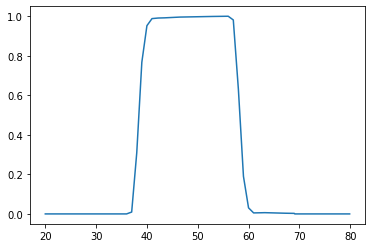

In [9]:
plt.plot(new_temp_x, interpfunc_final(new_temp_x))

In [10]:
df = pd.DataFrame(zip([2101],[interpfunc_final]),columns=['channel','templates'])
df.to_pickle(f'/global/cfs/cdirs/lz/users/yqie/PMT-ANALYSIS/TimingStudies/templates/trigger_template_{runs}.pkl')